# Data Cleaning

In [3]:
# import the library
%matplotlib inline

import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')

# convert scientific notation to decimals
pd.set_option('display.float_format', lambda x: '%.2f' % x)

# 1. Load Datasets

In [4]:
#Source file: https://www.kaggle.com/usdot/flight-delays#flights.csv

#Main dataset
df_delayed_flights = pd.read_csv('../data/flights.csv', low_memory=False)

#Complementary datasets
df_airports = pd.read_csv('../data/airports.csv', low_memory=False)
df_airlines = pd.read_csv('../data/airlines.csv', low_memory=False)

# 2. Summarize the data

In [5]:
print('------- Main Dataset, Flights -------')
print(df_delayed_flights.shape)
print(df_delayed_flights.columns)
print(df_delayed_flights.head())
print(df_delayed_flights.describe())

print('\n ------- Airports -------')
print(df_airports.shape)
print(df_airports.columns)
print(df_airports.head())
print(df_airports.describe())

print('\n ------- Airlines -------')
print(df_airlines.shape)
print(df_airlines.columns)
print(df_airlines.head())
print(df_airlines.describe())

------- Main Dataset, Flights -------
(5819079, 31)
Index(['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'FLIGHT_NUMBER',
       'TAIL_NUMBER', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT',
       'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT',
       'WHEELS_OFF', 'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE',
       'WHEELS_ON', 'TAXI_IN', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME',
       'ARRIVAL_DELAY', 'DIVERTED', 'CANCELLED', 'CANCELLATION_REASON',
       'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY',
       'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY'],
      dtype='object')
   YEAR  MONTH  DAY  DAY_OF_WEEK AIRLINE  FLIGHT_NUMBER TAIL_NUMBER  \
0  2015      1    1            4      AS             98      N407AS   
1  2015      1    1            4      AA           2336      N3KUAA   
2  2015      1    1            4      US            840      N171US   
3  2015      1    1            4      AA            258      N3HYAA   
4  2015      1    1       

# 3. Data Cleaning

## 3.1. Merge Columns - DATE

In [6]:
df_delayed_flights['DATE'] = pd.to_datetime(df_delayed_flights[['YEAR','MONTH', 'DAY']])
print(df_delayed_flights.columns)

Index(['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'FLIGHT_NUMBER',
       'TAIL_NUMBER', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT',
       'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT',
       'WHEELS_OFF', 'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE',
       'WHEELS_ON', 'TAXI_IN', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME',
       'ARRIVAL_DELAY', 'DIVERTED', 'CANCELLED', 'CANCELLATION_REASON',
       'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY',
       'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY', 'DATE'],
      dtype='object')


## 3.2. Remove non-relevant and duplicated columns

In [7]:
df_delayed_flights = df_delayed_flights.drop(['YEAR','DAY','DAY_OF_WEEK'], axis=1)
df_delayed_flights = df_delayed_flights.drop(['TAXI_OUT','TAXI_IN','WHEELS_OFF', 'WHEELS_ON','AIR_TIME','ELAPSED_TIME'], axis=1)
print(df_delayed_flights.columns)

Index(['MONTH', 'AIRLINE', 'FLIGHT_NUMBER', 'TAIL_NUMBER', 'ORIGIN_AIRPORT',
       'DESTINATION_AIRPORT', 'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME',
       'DEPARTURE_DELAY', 'SCHEDULED_TIME', 'DISTANCE', 'SCHEDULED_ARRIVAL',
       'ARRIVAL_TIME', 'ARRIVAL_DELAY', 'DIVERTED', 'CANCELLED',
       'CANCELLATION_REASON', 'AIR_SYSTEM_DELAY', 'SECURITY_DELAY',
       'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY', 'DATE'],
      dtype='object')


In [8]:
# df_airports = df_airports[['IATA_CODE','AIRPORT']]
# print(df_airports.columns)

df_airports = df_airports.drop(columns = ['CITY','COUNTRY'])
print(df_airports.columns)

Index(['IATA_CODE', 'AIRPORT', 'STATE', 'LATITUDE', 'LONGITUDE'], dtype='object')


## 3.3. Rename Columns

In [9]:
df_airports = df_airports.rename(index=str, columns={"IATA_CODE": "AIRPORT_CODE", "AIRPORT": "AIRPORT_NAME",
                                                     "STATE": "AIRPORT_STATE", "LATITUDE":"AIRPORT_LATITUDE",
                                                     "LONGITUDE":"AIRPORT_LONGITUDE"})
df_airlines.columns = ['AIRLINE_CODE','AIRLINE_NAME']

df_airports.columns

Index(['AIRPORT_CODE', 'AIRPORT_NAME', 'AIRPORT_STATE', 'AIRPORT_LATITUDE',
       'AIRPORT_LONGITUDE'],
      dtype='object')

## 3.4. Change Types / Values

In [10]:
# Function to convert from 'HHMM' string to datetime.time
# Reference: https://www.kaggle.com/fabiendaniel/predicting-flight-delays-tutorial

import datetime

def format_time(time_string):
    
    if isinstance(time_string, datetime.time):
        return time_string
    
    if pd.isnull(time_string):
        return np.nan
    
    else:
        if time_string == 2400: #12 midnight
            time_string = 0
            
        time_string = "{0:04d}".format(int(time_string)) #Format the string to be as 4 decimals (hh:mm)
        formated_time = datetime.time(int(time_string[0:2]), int(time_string[2:4])) #Split the 4 digits into 2 parts
        return formated_time

In [11]:
# Call the Function:

df_delayed_flights['SCHEDULED_DEPARTURE'] = df_delayed_flights['SCHEDULED_DEPARTURE'].apply(format_time)
df_delayed_flights['DEPARTURE_TIME'] = df_delayed_flights['DEPARTURE_TIME'].apply(format_time)
df_delayed_flights['SCHEDULED_ARRIVAL'] =df_delayed_flights['SCHEDULED_ARRIVAL'].apply(format_time)
df_delayed_flights['ARRIVAL_TIME'] = df_delayed_flights['ARRIVAL_TIME'].apply(format_time)

#Print a sample..
df_delayed_flights.loc[:5, ['SCHEDULED_DEPARTURE', 'SCHEDULED_ARRIVAL', 'DEPARTURE_TIME',
                            'ARRIVAL_TIME', 'DEPARTURE_DELAY', 'ARRIVAL_DELAY']]

,SCHEDULED_DEPARTURE,SCHEDULED_ARRIVAL,DEPARTURE_TIME,ARRIVAL_TIME,DEPARTURE_DELAY,ARRIVAL_DELAY
0,00:05:00,04:30:00,23:54:00,04:08:00,-11.00,-22.00
1,00:10:00,07:50:00,00:02:00,07:41:00,-8.00,-9.00
2,00:20:00,08:06:00,00:18:00,08:11:00,-2.00,5.00
3,00:20:00,08:05:00,00:15:00,07:56:00,-5.00,-9.00
4,00:25:00,03:20:00,00:24:00,02:59:00,-1.00,-21.00
5,00:25:00,06:02:00,00:20:00,06:10:00,-5.00,8.00


In [12]:
# Change 0-1 columns to bool

bool_cols = ['CANCELLED', 'DIVERTED']
df_delayed_flights[bool_cols] = df_delayed_flights[bool_cols].replace(to_replace=[0,1], value=[False,True])
df_delayed_flights[bool_cols].head()

,CANCELLED,DIVERTED
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False


In [13]:
#Replace cancellation reason with description of values

df_delayed_flights["CANCELLATION_REASON"].replace({'A':'Airline',
                                                   'B':'Weather',
                                                   'C':'National Air System',
                                                   'D':'Security'}, inplace=True)

df_delayed_flights["CANCELLATION_REASON"].value_counts()

Weather                48851
Airline                25262
National Air System    15749
Security                  22
Name: CANCELLATION_REASON, dtype: int64

## 3.5. Missing values

In [15]:
print("Delayed Flights Missing Values:\n", df_delayed_flights.isnull().sum())
print("Airoorts Missing Values:\n", df_airports.isnull().sum())
print("Airlines Flights Missing Values:\n", df_airlines.isnull().sum())

Delayed Flights Missing Values:
 MONTH                        0
AIRLINE                      0
FLIGHT_NUMBER                0
TAIL_NUMBER              14721
ORIGIN_AIRPORT               0
DESTINATION_AIRPORT          0
SCHEDULED_DEPARTURE          0
DEPARTURE_TIME           86153
DEPARTURE_DELAY          86153
SCHEDULED_TIME               6
DISTANCE                     0
SCHEDULED_ARRIVAL            0
ARRIVAL_TIME             92513
ARRIVAL_DELAY           105071
DIVERTED                     0
CANCELLED                    0
CANCELLATION_REASON    5729195
AIR_SYSTEM_DELAY       4755640
SECURITY_DELAY         4755640
AIRLINE_DELAY          4755640
LATE_AIRCRAFT_DELAY    4755640
WEATHER_DELAY          4755640
DATE                         0
dtype: int64
Airoorts Missing Values:
 AIRPORT_CODE         0
AIRPORT_NAME         0
AIRPORT_STATE        0
AIRPORT_LATITUDE     3
AIRPORT_LONGITUDE    3
dtype: int64
Airlines Flights Missing Values:
 AIRLINE_CODE    0
AIRLINE_NAME    0
dtype: int64


### CANCELLATION_REASON

In [16]:
df_delayed_flights["CANCELLED"].value_counts()

False    5729195
True       89884
Name: CANCELLED, dtype: int64

In [17]:
print("Total number of delayed flights: ", len(df_delayed_flights))
print("Cancelled flights= ", sum(df_delayed_flights['CANCELLED']))
print(df_delayed_flights['CANCELLATION_REASON'].value_counts())

Total number of delayed flights:  5819079
Cancelled flights=  89884
Weather                48851
Airline                25262
National Air System    15749
Security                  22
Name: CANCELLATION_REASON, dtype: int64


#### Conclusion: Number of missing data under the variable "CANCELLATION_REASON" is large since when the flight was not cancelled, no reason code was assigned. We can replace no values with  "Not Cancelled":

In [18]:
df_delayed_flights['CANCELLATION_REASON'] = df_delayed_flights['CANCELLATION_REASON'].fillna('Not_Cancelled')
df_delayed_flights['CANCELLATION_REASON'].isnull().sum()
print(df_delayed_flights['CANCELLATION_REASON'].value_counts())

Not_Cancelled          5729195
Weather                  48851
Airline                  25262
National Air System      15749
Security                    22
Name: CANCELLATION_REASON, dtype: int64


### DELAY REASONS

In [19]:
# If the delay wasn't caused by a facter, then the delay caused by that factor = 0.

delay_cause_cols = ['AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY']
df_delayed_flights[delay_cause_cols] = df_delayed_flights[delay_cause_cols].fillna(0.0)

### DEPARTURE_DELAY & ARRIVAL_DELAY

In [20]:
print("Departure Delays Missing Values = ", df_delayed_flights['DEPARTURE_DELAY'].isnull().sum())
print("Arrival Delays Missing Values = ", df_delayed_flights['ARRIVAL_DELAY'].isnull().sum())
print("Cancelled flights = ", df_delayed_flights['CANCELLED'].sum())

Departure Delays Missing Values =  86153
Arrival Delays Missing Values =  105071
Cancelled flights =  89884


In [21]:
print("Flights without departure and arrival delays = ",
      len(df_delayed_flights[(df_delayed_flights['DEPARTURE_DELAY'].isnull())
                             & (df_delayed_flights['ARRIVAL_DELAY'].isnull())].index))

print("Cancelled flights without arrival delay = ",
      len(df_delayed_flights[(df_delayed_flights['ARRIVAL_DELAY'].isnull())
                             & (df_delayed_flights['CANCELLED'] == 1)].index))

print("Cancelled flights without departure delay = ",
      len(df_delayed_flights[(df_delayed_flights['DEPARTURE_DELAY'].isnull())
                             & (df_delayed_flights['CANCELLED'] == 1)].index))

Flights without departure and arrival delays =  86153
Cancelled flights without arrival delay =  89884
Cancelled flights without departure delay =  86153


#### Conclosions:
- Flights without departure delays, do not have arrival delays. 
- Some flights without arrival delays, have departure delay.
- Cancelled flights, do not have arrival delays. > Makes sense.

In [22]:
# Mean delay for each airline.

airlines_dep_delays = df_delayed_flights.groupby('AIRLINE', sort=False)['DEPARTURE_DELAY'].mean()
airlines_arr_delays = df_delayed_flights.groupby('AIRLINE', sort=False)['ARRIVAL_DELAY'].mean()

print(airlines_dep_delays.sort_values())
print(airlines_arr_delays.sort_values())

AIRLINE
HA    0.49
AS    1.79
US    6.14
DL    7.37
OO    7.80
EV    8.72
AA    8.90
VX    9.02
MQ   10.13
WN   10.58
B6   11.51
F9   13.35
UA   14.44
NK   15.94
Name: DEPARTURE_DELAY, dtype: float64
AIRLINE
AS   -0.98
DL    0.19
HA    2.02
AA    3.45
US    3.71
WN    4.37
VX    4.74
UA    5.43
OO    5.85
MQ    6.46
EV    6.59
B6    6.68
F9   12.50
NK   14.47
Name: ARRIVAL_DELAY, dtype: float64


In [23]:
# Since the number of arrival delays is greater than the number of departure delays,
# fill the missing values in departure delays.

for idx in df_delayed_flights.index[df_delayed_flights['DEPARTURE_DELAY'].isnull()]:    
    
    # If the flight isn't cancelled,
    if(df_delayed_flights.loc[idx,'CANCELLED'] == 0):
        
        #  fill arr and dep delays with mean delay of that airline
        airline_code = df_flights.loc[idx,'AIRLINE_NAME']
        df_delayed_flights.at[idx,'DEPARTURE_DELAY'] = airlines_dep_delays.at[airline_code]
        df_delayed_flights.at[idx,'ARRIVAL_DELAY'] = airlines_arr_delays.at[airline_code]


In [24]:
# for the remaining values in arrival delay:
for idx in df_delayed_flights.index[df_delayed_flights['ARRIVAL_DELAY'].isnull()]:    
    
    # If the flight isn't cancelled, replace arrival delay with departure delay
    if(df_delayed_flights.loc[idx,'CANCELLED'] == 0):
        df_delayed_flights.at[idx,'ARRIVAL_DELAY'] = df_delayed_flights.loc[idx,'DEPARTURE_DELAY']


In [25]:
print("# Missing Values = ", len(df_delayed_flights[(df_delayed_flights['DEPARTURE_DELAY'].isnull())
                                   | df_delayed_flights['ARRIVAL_DELAY'].isnull()]))
print("# Cancelled flights = ", df_delayed_flights['CANCELLED'].sum())

# Missing Values =  89884
# Cancelled flights =  89884


In [26]:
df_delayed_flights.isnull().sum()

MONTH                      0
AIRLINE                    0
FLIGHT_NUMBER              0
TAIL_NUMBER            14721
ORIGIN_AIRPORT             0
DESTINATION_AIRPORT        0
SCHEDULED_DEPARTURE        0
DEPARTURE_TIME         86153
DEPARTURE_DELAY        86153
SCHEDULED_TIME             6
DISTANCE                   0
SCHEDULED_ARRIVAL          0
ARRIVAL_TIME           92513
ARRIVAL_DELAY          89884
DIVERTED                   0
CANCELLED                  0
CANCELLATION_REASON        0
AIR_SYSTEM_DELAY           0
SECURITY_DELAY             0
AIRLINE_DELAY              0
LATE_AIRCRAFT_DELAY        0
WEATHER_DELAY              0
DATE                       0
dtype: int64

## 3.6. Add Column - Flight Class

In [27]:
# Add column for flight Class (On_Time, Delayed, Cancelled)

# Default value:
df_delayed_flights['CLASS'] = 'On_Time'

In [28]:
# 1- Delayed flights
    
delayed = list(df_delayed_flights[(df_delayed_flights['DEPARTURE_DELAY'] != 0) |
                                  (df_delayed_flights['ARRIVAL_DELAY'] != 0)].index)  

df_delayed_flights.at[delayed, 'CLASS'] = 'Delayed'
print("# Delayed flights = ", len(df_delayed_flights[df_delayed_flights['CLASS'] == 'Delayed']))

# Delayed flights =  5807672


In [29]:
# 2- Cancelled flights

cancelled_flights = list(df_delayed_flights[df_delayed_flights['CANCELLED'] == True].index)    
df_delayed_flights.at[cancelled_flights, 'CLASS'] = 'Cancelled'
    
print("# Cancelled flights = ", len(df_delayed_flights[df_delayed_flights['CLASS'] == 'Cancelled']))

# Cancelled flights =  89884


In [30]:
# 3- On-time flights

print("On-time flights = ",len(df_delayed_flights[df_delayed_flights['CLASS'] == 'On_Time']))

On-time flights =  11407


In [31]:
df_delayed_flights['CLASS'].value_counts()

Delayed      5717788
Cancelled      89884
On_Time        11407
Name: CLASS, dtype: int64

#### Conclusion: 2704367 delayed flights observed vs. 87344 number of cancelled flights

### Another Approach :

In [32]:
# # Determine number of delayed vs. cancelled flights
# df_delay = df_delayed_flights[(df_delayed_flights['DEPARTURE_DELAY'] > 0) |
#                               (df_delayed_flights['ARRIVAL_DELAY'] > 0)]

# df_delay['CLASS'] = 'Delayed'
# len(df_delay)

In [33]:
# df_cancel = df_delayed_flights[df_delayed_flights['CANCELLED'] == True]
# df_cancel['CLASS'] = 'Cancelled'
# len(df_cancel)

In [34]:
# # Determine number of early flights
# df_early = df_delayed_flights[(df_delayed_flights['DEPARTURE_DELAY'] < 0) &
#                               (df_delayed_flights['ARRIVAL_DELAY'] < 0)]

# df_delay['CLASS'] = 'Early'
# len(df_delay)

In [35]:
# df_ontime = df_delayed_flights[(~df_delayed_flights.index.isin(df_delay.index))
#                                &(~df_delayed_flights.index.isin(df_cancel.index))
#                                &(~df_delayed_flights.index.isin(df_early.index))]

# df_ontime['CLASS'] = 'On_Time'
# len(df_ontime)

In [36]:
# df_join = pd.concat([df_delay, df_cancel, df_ontime, df_early], sort=False)

In [37]:
# # issue with the concat of the three dataframes. Nan's skus the number of joins. 
# len(df_join), len(df_delayed_flights)

In [38]:
# df_join['CLASS'] = df_join['CLASS'].fillna('On_Time')

In [39]:
# df_join['CLASS'].value_counts()

In [40]:
# df_join.head()

# 4. Remove Outliers

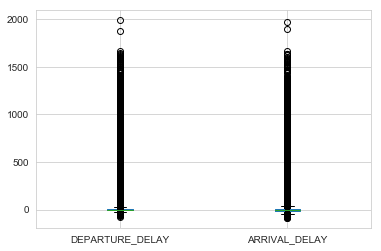

In [41]:
df_delayed_flights[["DEPARTURE_DELAY","ARRIVAL_DELAY"]].plot.box()
plt.show()

C:\Users\A-Sha\Anaconda3\lib\site-packages\numpy\lib\histograms.py:754: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\A-Sha\Anaconda3\lib\site-packages\numpy\lib\histograms.py:755: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


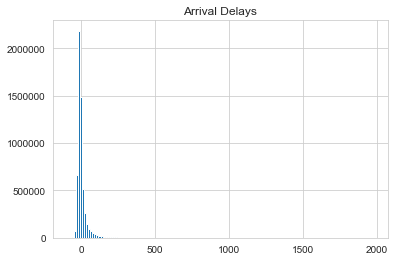

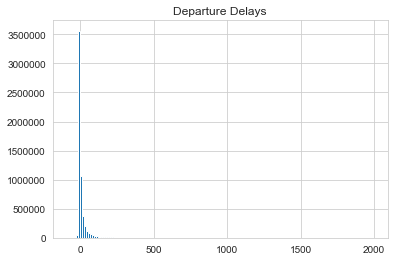

In [42]:
plt.hist(df_delayed_flights['ARRIVAL_DELAY'], bins=150)
plt.title("Arrival Delays")
plt.show()

plt.hist(df_delayed_flights['DEPARTURE_DELAY'], bins=150)
plt.title("Departure Delays")
plt.show()

In [43]:
#Determine Outliers

mean_arrival_delays = np.mean(df_delayed_flights['ARRIVAL_DELAY'] )
sd_arrival_delays = np.std(df_delayed_flights['ARRIVAL_DELAY'])

mean_departure_delays = np.mean(df_delayed_flights['DEPARTURE_DELAY'])
sd_departure_delays = np.std(df_delayed_flights['DEPARTURE_DELAY'])

print('Arrival Delays:\t \t Mean = {0} \t SD = {1}'.format(mean_arrival_delays, sd_arrival_delays))
print('Departure Delays:\t Mean = {0} \t SD = {1}'.format(mean_departure_delays, sd_departure_delays))


Arrival Delays:	 	 Mean = 4.464009341626529 	 SD = 39.36796042230013
Departure Delays:	 Mean = 9.370158275198389 	 SD = 37.080939262729146


In [44]:
#Arrrival_delay or Departure_delay != 0 

arrival_delays = df_delayed_flights[df_delayed_flights['ARRIVAL_DELAY'] != 0.00]['ARRIVAL_DELAY']
departure_delays = df_delayed_flights[df_delayed_flights['DEPARTURE_DELAY'] != 0.00]['DEPARTURE_DELAY']

print(arrival_delays.shape)


mean_ad = np.mean(arrival_delays)
sd_ad = np.std(arrival_delays)

mean_dd = np.mean(departure_delays)
sd_dd = np.std(departure_delays)

print("With removing on-time flights:")

print('Arrival Delays:\t \t Mean = {0} \t SD = {1}'.format(mean_ad, sd_ad))
print('Departure Delays:\t Mean = {0} \t SD = {1}'.format(mean_dd, sd_dd))


(5692062,)
With removing on-time flights:
Arrival Delays:	 	 Mean = 4.565220883734861 	 SD = 39.805946370311176
Departure Delays:	 Mean = 9.941291362037587 	 SD = 38.11990930423063


In [45]:
# Removing
flights_to_remove = []

# remove based on arrival and departure delays (normal distribution)
flights_to_remove = flights_to_remove + list(df_delayed_flights[df_delayed_flights['ARRIVAL_DELAY'] > mean_ad + 3.0* sd_ad].index)
flights_to_remove = flights_to_remove + list(df_delayed_flights[df_delayed_flights['ARRIVAL_DELAY'] < mean_ad - 3.0* sd_ad].index)

flights_to_remove = flights_to_remove + list(df_delayed_flights[df_delayed_flights['DEPARTURE_DELAY'] > mean_dd + 3.0* sd_dd].index)
flights_to_remove = flights_to_remove + list(df_delayed_flights[df_delayed_flights['DEPARTURE_DELAY'] < mean_dd - 3.0* sd_dd].index)

print('')
print('# Flights to remove', len(flights_to_remove))



# Flights to remove 219310


In [46]:
new_delayed_flights = df_delayed_flights[~df_delayed_flights.index.isin(flights_to_remove)]
print("Was: ", df_delayed_flights.shape, " Now: ", new_delayed_flights.shape)

Was:  (5819079, 24)  Now:  (5697506, 24)


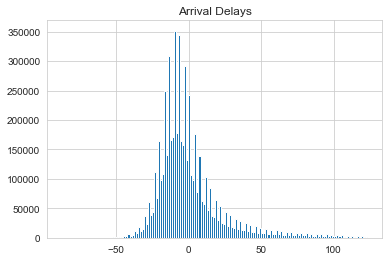

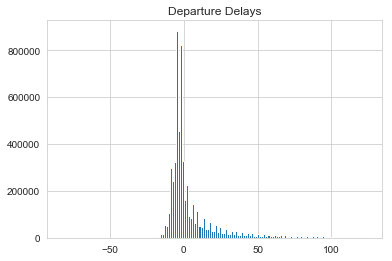

In [47]:
plt.hist(new_delayed_flights['ARRIVAL_DELAY'], bins=150)
plt.title("Arrival Delays")
plt.show()

plt.hist(new_delayed_flights['DEPARTURE_DELAY'], bins=150)
plt.title("Departure Delays")
plt.show()

## 5. Merging datasets

In [49]:
df_merge_v1 = new_delayed_flights.copy()

#Merge Airlines and Flights dfs
df_merge_v1 = pd.merge(new_delayed_flights, df_airlines, left_on='AIRLINE', right_on='AIRLINE_CODE', how='left')

#Merge Airports and Flights dfs on Origin_Airport and Airport_Code
df_merge_v1 = pd.merge(df_merge_v1, df_airports, left_on='ORIGIN_AIRPORT', right_on='AIRPORT_CODE', how='left')
df_merge_v1.rename(columns={'AIRPORT_CODE':'ORIGIN_AC', #Origin Airport Code
                            'AIRPORT_NAME':'ORIGIN_NAME', #Origin Airport Name
                            'AIRPORT_LATITUDE':'ORIGIN_LATITUDE', 'AIRPORT_LONGITUDE':'ORIGIN_LONGITUDE', #Origin Airport Location
                            'AIRPORT_STATE':'ORIGIN_STATE'} , inplace=True)

df_merge_v1.drop(['AIRLINE','ORIGIN_AIRPORT'], axis=1, inplace=True)

#Merge Airports and Flights dfs on Destination_Airport and Airport_Code
df_merge_v1 = pd.merge(df_merge_v1, df_airports, left_on='DESTINATION_AIRPORT', right_on='AIRPORT_CODE', how='left')
df_merge_v1.rename(columns={'AIRPORT_NAME':'DESTINATION_NAME',
                            'AIRPORT_CODE': 'DESTINATION_AC',
                            'AIRPORT_LATITUDE':'DEST_LATITUDE', 'AIRPORT_LONGITUDE':'DEST_LONGITUDE',
                            'AIRPORT_STATE':'DEST_STATE'} , inplace=True)

df_merge_v1.drop('DESTINATION_AIRPORT', axis=1, inplace=True)

In [50]:
print("Merged Dataframe Columns: \n", df_merge_v1.columns)

df_merge_v1[['DESTINATION_NAME', 'DESTINATION_AC', 'DEST_STATE','ORIGIN_NAME', 'ORIGIN_AC', 'ORIGIN_STATE']].head()

Merged Dataframe Columns: 
 Index(['MONTH', 'FLIGHT_NUMBER', 'TAIL_NUMBER', 'SCHEDULED_DEPARTURE',
       'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'SCHEDULED_TIME', 'DISTANCE',
       'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME', 'ARRIVAL_DELAY', 'DIVERTED',
       'CANCELLED', 'CANCELLATION_REASON', 'AIR_SYSTEM_DELAY',
       'SECURITY_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY',
       'WEATHER_DELAY', 'DATE', 'CLASS', 'AIRLINE_CODE', 'AIRLINE_NAME',
       'ORIGIN_AC', 'ORIGIN_NAME', 'ORIGIN_STATE', 'ORIGIN_LATITUDE',
       'ORIGIN_LONGITUDE', 'DESTINATION_AC', 'DESTINATION_NAME', 'DEST_STATE',
       'DEST_LATITUDE', 'DEST_LONGITUDE'],
      dtype='object')


,DESTINATION_NAME,DESTINATION_AC,DEST_STATE,ORIGIN_NAME,ORIGIN_AC,ORIGIN_STATE
0,Seattle-Tacoma International Airport,SEA,WA,Ted Stevens Anchorage International Airport,ANC,AK
1,Palm Beach International Airport,PBI,FL,Los Angeles International Airport,LAX,CA
2,Charlotte Douglas International Airport,CLT,NC,San Francisco International Airport,SFO,CA
3,Miami International Airport,MIA,FL,Los Angeles International Airport,LAX,CA
4,Ted Stevens Anchorage International Airport,ANC,AK,Seattle-Tacoma International Airport,SEA,WA


## Save file

In [52]:
df_merge_v1.to_csv('../data/flightsmerged.csv', index=False)